In [159]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
my_file = open('Stocks_List.txt','r')
stocks = my_file.read().split('\n')
stock_analysis = ['AAPL', 'MSFT', 'PG', 'GE']
time_frame = '1y'

In [53]:
tickers = {stock: yf.Ticker(stock) for stock in stocks}

In [54]:
data = pd.DataFrame({stock: tickers[stock].history(period=time_frame)['Close'].pct_change() for stock in stock_analysis})

In [156]:
mu = np.array([data.mean()]).T
coVa = np.array(data.cov())
returns = np.linspace(min(mu),max(mu),num=100)
one = np.ones((len(mu),1))

coVainv = np.linalg.inv(coVa)

a = np.dot(mu.T,np.dot(coVainv,mu))[0][0]
b = np.dot(mu.T,np.dot(coVainv,one))[0][0]
c = np.dot(one.T,np.dot(coVainv,one))[0][0]

Am = [[a,b],[b,c]]

Ainv = np.linalg.inv(Am)


def get_weights(return0):
    rhs = np.dot(Ainv,np.array([[return0],[1]]))
    lhs = np.dot(coVainv,np.concatenate((mu,one),axis=1))
    return np.dot(lhs,rhs)

def get_ret_var(return0):
    weights = get_weights(return0)
    return [np.dot(weights.T,np.dot(coVa,weights))[0][0],np.dot(weights.T,mu)[0][0]]

In [164]:
frontier = np.array([get_ret_var(return0[0]) for return0 in returns])

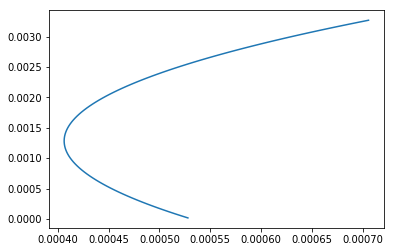

In [167]:
x,y = frontier.T
plt.plot(x,y)